In [1]:
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
from matplotlib import ticker


In [2]:
# Load the dataset
file_path = "ML data_final2.xlsx"  # Replace with your actual file path
data = pd.read_excel(file_path)

In [3]:
# Specify the features to plot
features = [
    "Area_res", "Area_rec", "res_time", "rec_time", "C_res", "C_rec",
    "Tau_res", "Tau_rec", "Yo_res", "Yo_rec", "Response"
]


In [4]:
target = "GAS"  # Replace with the actual column name for the gas type
data_sets = data[features].values.tolist()
# data_sets = [data[feature].values.tolist() for feature in features]
gases = data[target].unique()

In [5]:
# Assign colors to each gas type
#colors = cm.get_cmap('tab10', len(gases))  # Use a colormap to generate unique colors
#gas_color_map = {gas: colors(i) for i, gas in enumerate(gases)}
# Define a custom color palette
custom_colors = ['#F3A2BE', '#92A1C3', '#8da0cb', '#CCA1C9', '#a6d854', '#fc8d62', '#66c2a5', '#7f7f7f', '#bcbd22', '#17becf']
gas_color_map = {gas: custom_colors[i % len(custom_colors)] for i, gas in enumerate(gases)}
'''
# Use a seaborn palette
palette = sns.color_palette('pastel', len(gases))  # Options: 'deep', 'pastel', 'dark', 'colorblind'
gas_color_map = {gas: palette[i] for i, gas in enumerate(gases)}
'''

"\n# Use a seaborn palette\npalette = sns.color_palette('pastel', len(gases))  # Options: 'deep', 'pastel', 'dark', 'colorblind'\ngas_color_map = {gas: palette[i] for i, gas in enumerate(gases)}\n"

In [6]:
def parallel_coordinates(data_sets, feature_names, gas_labels, style=None):
    dims = len(data_sets[0])
    x = range(dims+1)
    fig, axes = plt.subplots(1, dims, sharey=False, figsize=(15, 6))

    le = LabelEncoder()
    le.fit(gas_labels)
    encoded_gas_labels = le.transform(gas_labels)
    for row_idx, label in enumerate(encoded_gas_labels):
        data_sets[row_idx].append(label)
    feature_names = feature_names + ["Label"]
    
    # Calculate the limits for the data
    min_max_range = []
    for i, m in enumerate(zip(*data_sets)):
        mn = min(m)
        mx = max(m)
        if mn == mx:
            mn -= 0.5
            mx += 0.5
        r = float(mx - mn)
        min_max_range.append((mn, mx, r))
    
    # Normalize the data sets
    norm_data_sets = []
    for ds in data_sets:
        nds = [
            (value - min_max_range[dimension][0]) / min_max_range[dimension][2]
            for dimension, value in enumerate(ds)
        ]
        norm_data_sets.append(nds)
    data_sets = norm_data_sets
    
    # Plot the datasets on all subplots
    for i, ax in enumerate(axes):
        for dsi, d in enumerate(data_sets):
            ax.plot(x, d, color=gas_color_map[gas_labels[dsi]])
        ax.set_xlim([x[i], x[i + 1]])

    # Set x-axis ticks and labels
    for dimension, (axx, xx) in enumerate(zip(axes, x[:-1])):
        axx.xaxis.set_major_locator(ticker.FixedLocator([xx]))
        ticks = len(axx.get_yticklabels())
        labels = []
        step = min_max_range[dimension][2] / (ticks - 3)
        mn = min_max_range[dimension][0]
        for i in range(ticks-2):
            v = mn + i * step
            labels.append(f'{v:.2f}')
        axx.set_yticklabels(["s", *labels, "e"])
        axx.set_xlabel(feature_names[dimension])
    
    # Add right-hand ticks for the final axis
    axx = plt.twinx(axes[-1])
    axx.set_yticks([-0.3, 0, 1, 2, 3, 4, 5, 6, 6.3])
    dimension += 1
    axx.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
    ticks = len(axx.get_yticklabels())
    axx.set_yticklabels(["", *list(le.classes_), ""])

    # Stack the subplots
    plt.subplots_adjust(wspace=0)
    plt.suptitle("Parallel Coordinates Plot for Gas Sensing Features")
    return plt, min_max_range


/tmp/ipykernel_171/553433272.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axx.set_yticklabels(["s", *labels, "e"])


Feature 'Area_res': Min = 14.90, Max = 93.50
Feature 'Area_rec': Min = 10.20, Max = 259.00
Feature 'res_time': Min = 6.20, Max = 62.00
Feature 'rec_time': Min = 7.80, Max = 141.08
Feature 'C_res': Min = -96.50, Max = 79.00
Feature 'C_rec': Min = -795.00, Max = 715.00
Feature 'Tau_res': Min = -305.88, Max = 323.72
Feature 'Tau_rec': Min = 7.56, Max = 72.74
Feature 'Yo_res': Min = -79.80, Max = 9.79
Feature 'Yo_rec': Min = 2.07, Max = 9.70
Feature 'Response': Min = 1.20, Max = 11.40
Feature 'Label': Min = 0.00, Max = 6.00


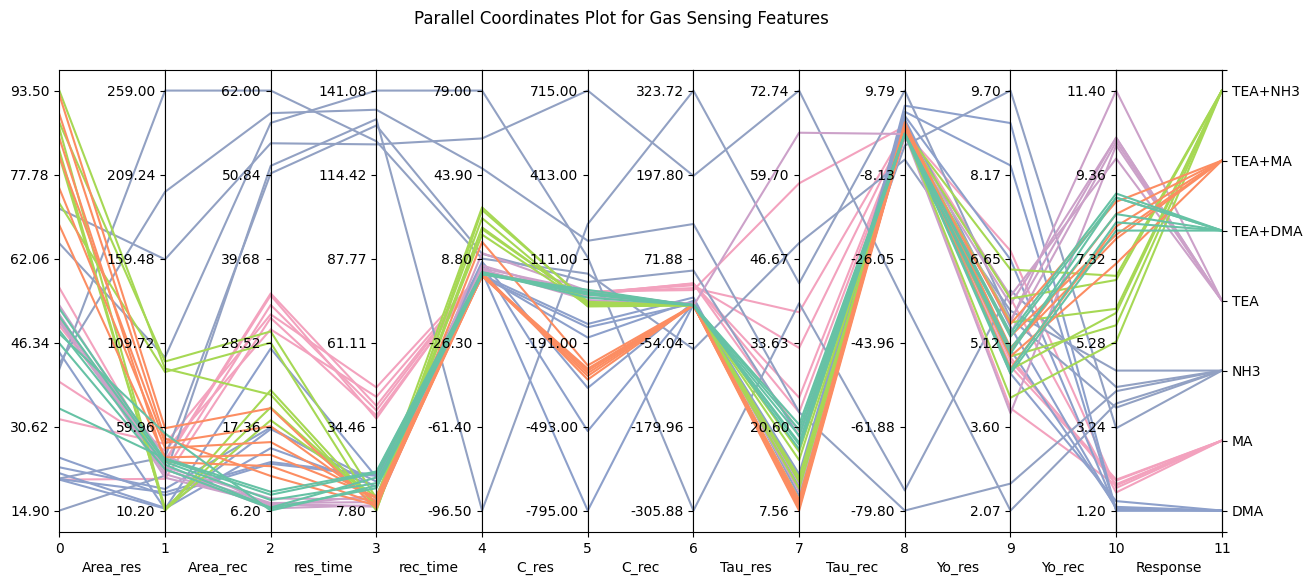

In [7]:
# Call the function
plot, min_max_range = parallel_coordinates(data_sets, features, data[target].tolist())

# Print the min and max values for each feature
for i, feature in enumerate(features + ["Label"]):  # Include "Label" as it's part of the data
    mn, mx, _ = min_max_range[i]
    print(f"Feature '{feature}': Min = {mn:.2f}, Max = {mx:.2f}")

# Show the plot
plot.savefig("parallel_coordinates_plot.png", dpi=300, bbox_inches='tight')  # Save the plot as an image
plot.show()


In [20]:
# Encode GAS labels
le = LabelEncoder()
data["GAS_encoded"] = le.fit_transform(data["GAS"])

In [21]:
# Prepare the data
X = data[features]
y = data[target]

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [23]:
# Train the Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
print(f"Test set size: {len(y_test)}")


Test set size: 13


In [25]:
# Predict the test set
y_pred = model.predict(X_test)

In [26]:
# Construct the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

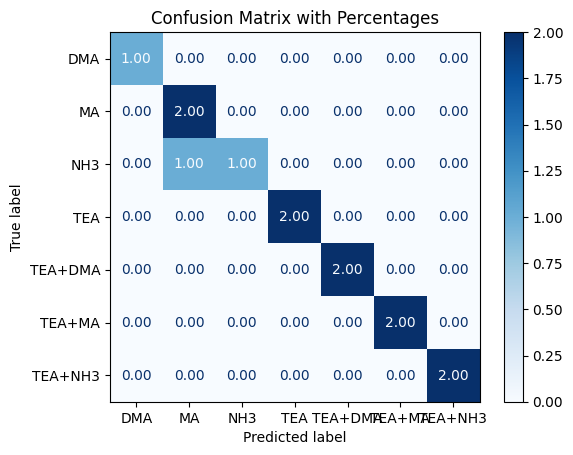

In [27]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.title("Confusion Matrix with Percentages")
plt.show()

In [28]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 92.31%


In [29]:
# Print the data including features, actual gas, and predicted gas
result_data = X_test.copy()
result_data['Actual_GAS'] = y_test
result_data['Predicted_GAS'] = y_pred


In [30]:
result_data

,Area_res,Area_rec,res_time,rec_time,C_res,C_rec,Tau_res,Tau_rec,Yo_res,Yo_rec,Response,Actual_GAS,Predicted_GAS
27,87.5,98.5,30.00,11.700,30.20,-48.90,2.24000,16.70000,0.8120,4.87,5.70,TEA+NH3,TEA+NH3
29,93.5,94.3,21.60,8.000,21.10,-47.60,1.78000,12.70000,0.8760,4.63,6.00,TEA+NH3,TEA+NH3
8,14.9,30.9,52.00,132.000,-96.50,235.00,323.72102,42.83487,9.7900,5.56,3.70,NH3,MA
37,51.2,39.0,7.60,16.500,2.98,-10.20,1.81000,19.20000,0.5910,5.01,8.40,TEA+DMA,TEA+DMA
19,51.3,34.8,6.50,9.500,11.10,-5.60,1.66959,11.85850,0.0492,5.82,10.25,TEA,TEA
21,50.4,43.2,6.80,12.650,4.21,-38.00,1.09000,66.20000,0.5320,3.84,10.07,TEA,TEA
35,92.7,59.0,19.80,8.600,15.80,-273.00,1.95000,8.41000,1.4700,5.24,7.90,TEA+MA,TEA+MA
32,89.1,52.9,10.80,9.400,2.92,-324.00,2.34000,9.21000,2.2000,4.96,8.40,TEA+MA,TEA+MA
40,46.2,34.7,6.50,14.900,2.19,-1.39,1.47000,17.10000,0.5320,4.56,8.00,TEA+DMA,TEA+DMA
5,20.7,29.0,31.79,38.000,2.53,-11.00,31.85577,32.80421,1.0400,6.79,1.75,MA,MA


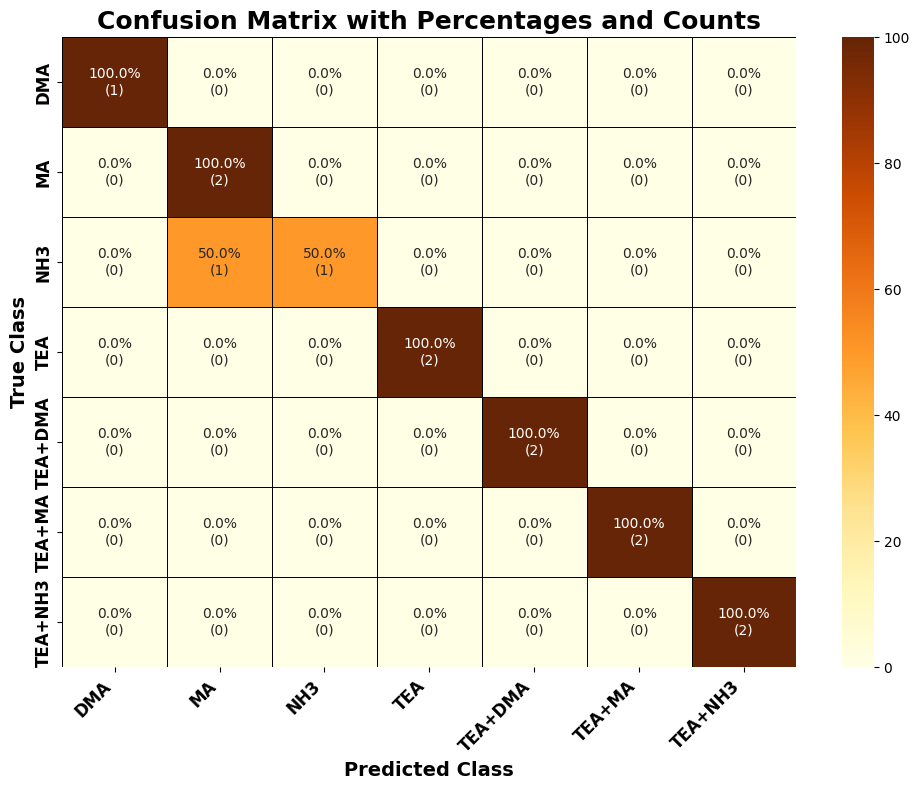

In [37]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix to percentage
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create a combined matrix of percentage and count for display
cm_display = np.empty_like(cm, dtype=object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cm_display[i, j] = f"{cm_percentage[i, j]:.1f}%\n({cm[i, j]})"

# Plot confusion matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percentage,
    annot=cm_display,
    fmt="",
    cmap="YlOrBr",  # Custom colormap close to maroon
    cbar=True,  # Add color bar
    xticklabels=le.inverse_transform(range(len(gases))),
    yticklabels=le.inverse_transform(range(len(gases))),
    linewidths=0.5,
    linecolor='black'
)

# Improve aesthetics
plt.title("Confusion Matrix with Percentages and Counts", fontsize=18, weight='bold')
plt.xlabel("Predicted Class", fontsize=14, weight='bold')
plt.ylabel("True Class", fontsize=14, weight='bold')
plt.xticks(fontsize=12, rotation=45, ha="right", weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.tight_layout()

# Save the plot as an image
#plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [31]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix to percentage
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

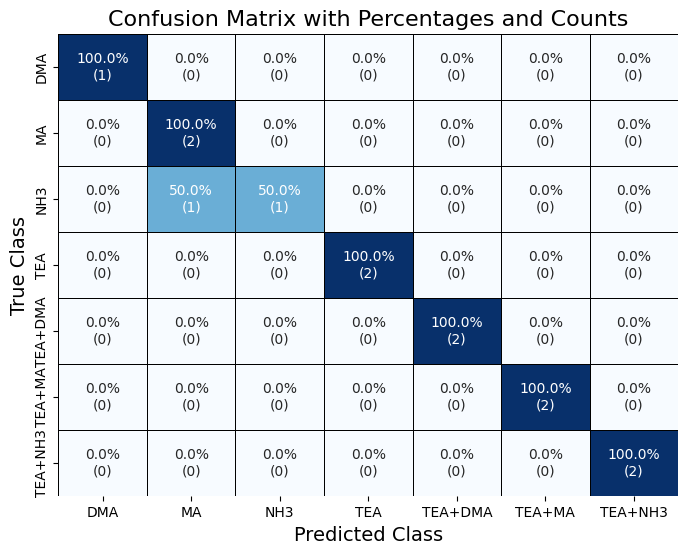

In [32]:
# Create a combined matrix of percentage and count for display
cm_display = np.empty_like(cm, dtype=object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cm_display[i, j] = f"{cm_percentage[i, j]:.1f}%\n({cm[i, j]})"

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_percentage,
    annot=cm_display,
    fmt="",
    cmap="Blues",
    cbar=False,
    xticklabels=le.inverse_transform(range(len(gases))),
    yticklabels=le.inverse_transform(range(len(gases))),
    linewidths=0.5,
    linecolor='black'
)
plt.title("Confusion Matrix with Percentages and Counts", fontsize=16)
plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("True Class", fontsize=14)
plt.show()

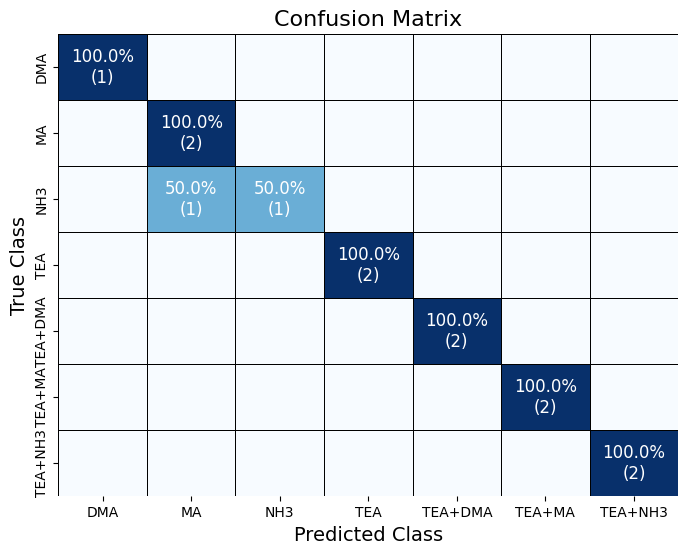

In [33]:
# Create a combined matrix of percentage and count for display
cm_display = np.empty_like(cm, dtype=object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] != 0:  # Avoid showing cells with 0% values
            cm_display[i, j] = f"{cm_percentage[i, j]:.1f}%\n({cm[i, j]})"
        else:
            cm_display[i, j] = ""  # Leave empty for 0% values

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_percentage,
    annot=cm_display,
    fmt="",
    cmap="Blues",
    cbar=False,
    xticklabels=le.inverse_transform(range(len(gases))),
    yticklabels=le.inverse_transform(range(len(gases))),
    linewidths=0.5,
    linecolor="black",
    annot_kws={"fontsize": 12},  # Adjust font size for better clarity
)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("True Class", fontsize=14)
plt.show()

In [36]:
# Save the results to a CSV file if needed
#result_data.to_csv("gas_prediction_results.csv", index=False)
#print("\nResults saved to 'gas_prediction_results.csv'.")